In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [12]:
#  Читаю файл
df = pd.read_csv('athlete_events.csv')

In [13]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [14]:
#  Беглый взгляд на данные
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [15]:
#  Типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [16]:
# Ищу пропущенные знчения
df.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

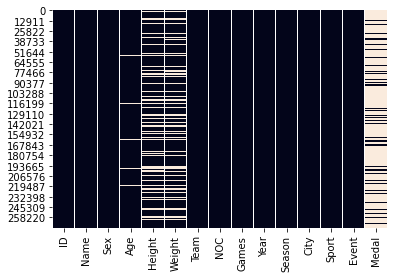

In [17]:
# График с пропусками
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [18]:
# Сумма всех пропущенных значений
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [19]:
# Замена всех пропущенных значений на среднее
col_null = ['Age', 'Height', 'Weight']
for col in col_null:
    df[col] = df[col].fillna(np.mean(df[col]))
    df[col] = np.round(df[col], 1)

In [20]:
# Замена всех пропусков с медалями
df['Medal'].fillna('No medal', inplace=True)

In [21]:
df.tail(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No medal
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No medal
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No medal
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,No medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No medal
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,No medal


In [22]:
# Датасеты по полу
women = df[df.Sex == 'F']
men = df[df.Sex == 'M']

In [23]:
women.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No medal


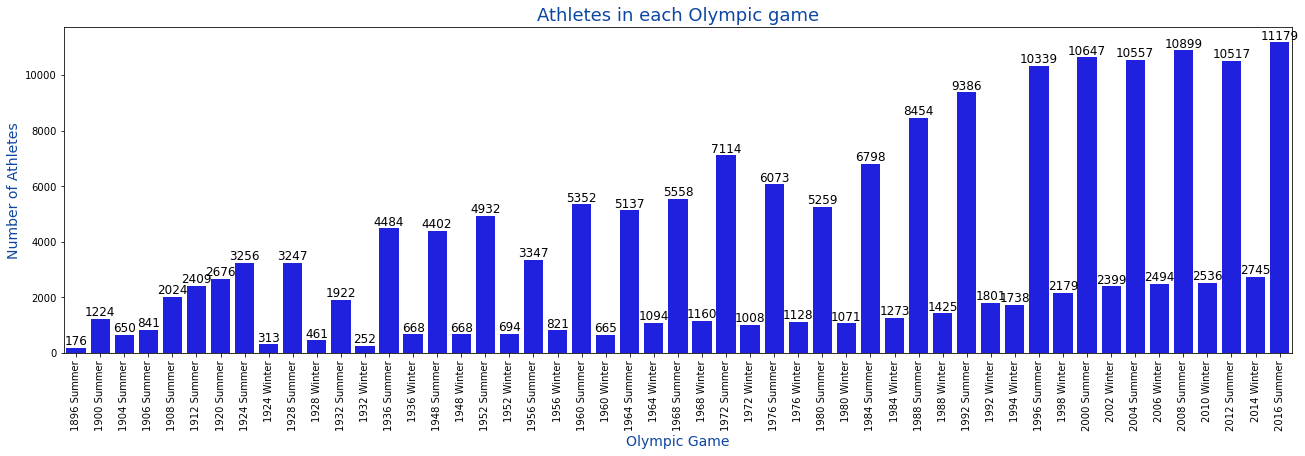

In [24]:
# 1 Количество атлетов,учавствующих в соревнованиях

games_athletes = df.pivot_table(
    df, index=['Games'], aggfunc=lambda x: len(x.unique())
    ).reset_index()[['Games', 'ID']]
fig, ax = plt.subplots(figsize=(22, 6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="blue")
a.set_xticklabels(labels=games_athletes['Games'], rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

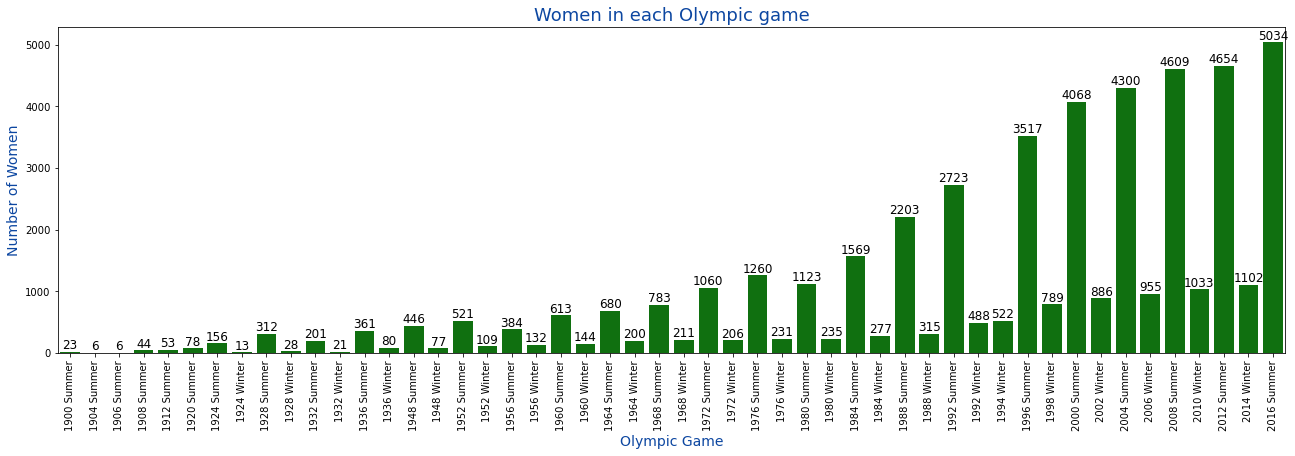

In [25]:
# Количествоженщин,учавствующих всоревнованиях
games_athletes = women.pivot_table(
    women, index=['Games'], aggfunc=lambda x: len(x.unique())
    ).reset_index()[['Games', 'ID']]
fig, ax = plt.subplots(figsize=(22, 6))
a = sns.barplot(x='Games', y='ID', data=games_athletes, ax=ax, color="green")
a.set_xticklabels(labels=games_athletes['Games'], rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('Olympic Game', size=14, color="#0D47A1")
ax.set_ylabel('Number of Women', size=14, color="#0D47A1")
ax.set_title('Women in each Olympic game', size=18, color="#0D47A1")

plt.show()

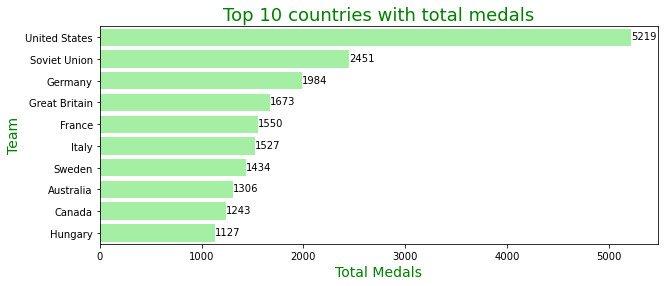

In [26]:
# 2
#  Страны, где всех больше медалей
top_country = df[df['Medal'] != 'No medal'].groupby(
        'Team').count().reset_index()[['Team', 'Medal']].sort_values(
        'Medal', ascending=False
        ).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    x="Medal", y="Team", data=top_country, label="Team", color="palegreen"
    )

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Total Medals', size=14, color="green")
ax.set_ylabel('Team', size=14, color="green")
ax.set_title('Top 10 countries with total medals', size=18, color="green")
plt.show()

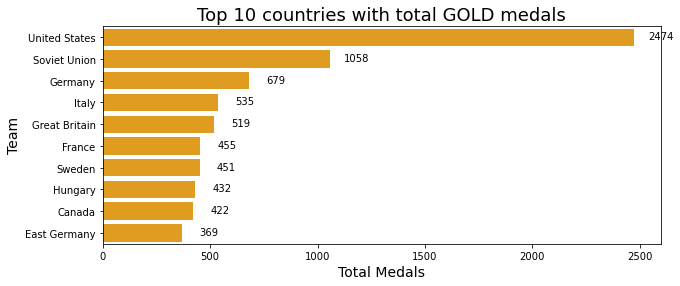

In [27]:
# Страны, где всех больше золотых медалей
top_country = df[df['Medal'] == 'Gold'].groupby('Team').count().reset_index()[
        ['Team', 'Medal']].sort_values('Medal', ascending=False).head(10)
f, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    x="Medal", y="Team", data=top_country, label="Team", color="orange"
    )

for p in ax.patches:
    ax.text(p.get_width() + 125,
            p.get_y() + (p.get_height()/2) + .1,
            '{:1.0f}'.format(p.get_width()),
            ha="center")

ax.set_xlabel('Total Medals', size=14, color="black")
ax.set_ylabel('Team', size=14, color="black")
ax.set_title('Top 10 countries with total GOLD medals', size=18, color="black")
plt.show()

In [28]:
# 3 Датасет с золотыми медалями
gold_medal = df[df['Medal'] == 'Gold']
sports = gold_medal.groupby(['Sport']).size()
top_gold_medal_sports = pd.DataFrame(
    {'Sports': sports.index, 'Count': sports.values}
    )
top_gold_medal_sports.sort_values(
    ['Count', 'Sports'], ascending=[False, True], inplace=True
    )

In [29]:
top_gold_medal_sports.head(10)

,Sports,Count
5,Athletics,1339
54,Swimming,1099
43,Rowing,978
27,Gymnastics,791
22,Fencing,594
29,Hockey,518
24,Football,515
30,Ice Hockey,508
46,Sailing,450
19,Cycling,424


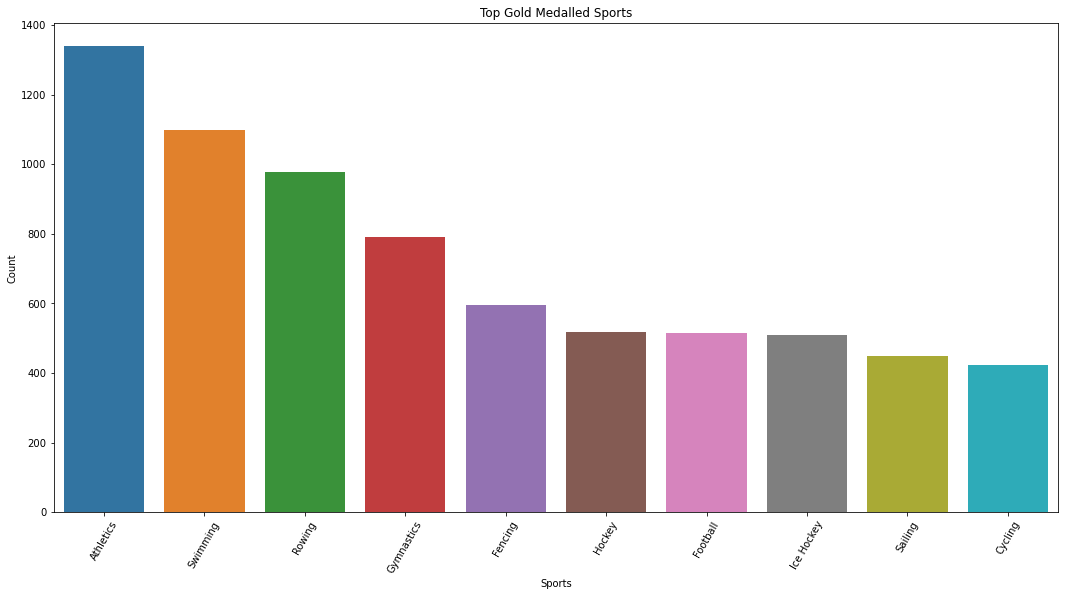

In [30]:
# Топ 10 видов спорта с максимальным количеством золотых медалей
plt.figure(figsize=(18, 9))
sns.barplot(
    x=top_gold_medal_sports['Sports'][:10], 
    y=top_gold_medal_sports['Count'][:10]
    )
plt.xticks(rotation=60)
plt.title('Top Gold Medalled Sports')

plt.show()

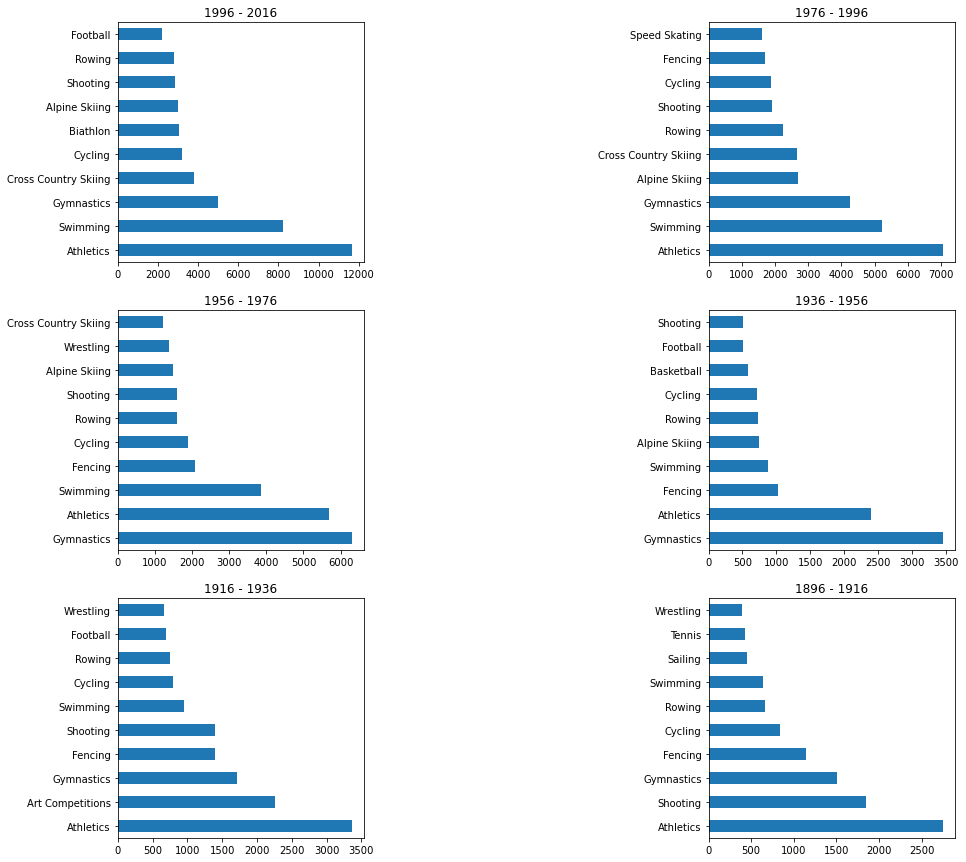

In [31]:
# Популярные виды спорта в в интервалах лет
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title('1996 - 2016')
pd.value_counts(df[df.Year > 1996].Sport)[:10].plot(kind='barh')
ax2 = fig.add_subplot(3, 3, 3)
ax2.set_title('1976 - 1996')
pd.value_counts(
    df[(df.Year < 1996) & (df.Year > 1976)].Sport
    )[:10].plot(kind='barh')
ax3 = fig.add_subplot(3, 3, 4)
ax3.set_title('1956 - 1976')
pd.value_counts(
    df[(df.Year < 1976) & (df.Year > 1956)].Sport
    )[:10].plot(kind='barh')
ax4 = fig.add_subplot(3, 3, 6)
ax4.set_title('1936 - 1956')
pd.value_counts(
    df[(df.Year < 1956) & (df.Year > 1936)].Sport
    )[:10].plot(kind='barh')
ax5 = fig.add_subplot(3, 3, 7)
ax5.set_title('1916 - 1936')
pd.value_counts(
    df[(df.Year < 1936) & (df.Year > 1916)].Sport
    )[:10].plot(kind='barh')
ax6 = fig.add_subplot(3, 3, 9)
ax6.set_title('1896 - 1916')
pd.value_counts(df[(df.Year < 1916)].Sport)[:10].plot(kind='barh')

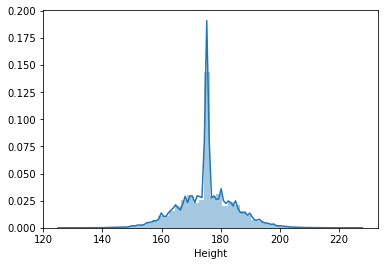

In [32]:
# 4 График распределения роста
sns.distplot(df.Height)

In [33]:
# Средний рост
df['Height'].mean()

175.33032096951203

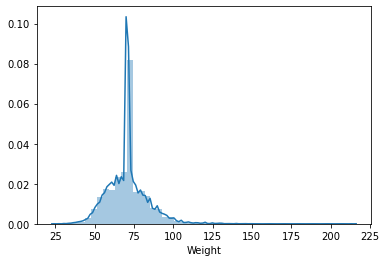

In [34]:
# График распределения веса
sns.distplot(df.Weight)

In [35]:
# Средний вес
df['Weight'].mean()

70.70183795857888

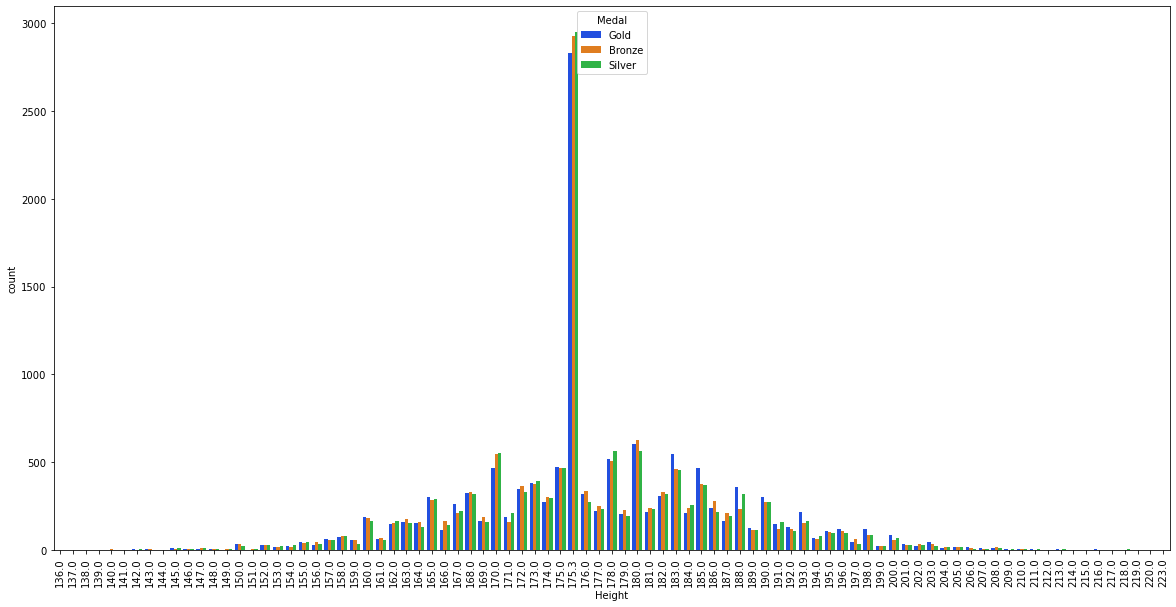

In [36]:
# Влияние роста на медали
df_no_medal = df.loc[df['Medal'] != 'No medal']
fig = plt.subplots(figsize=(20, 10))
d = sns.countplot(x='Height', data=df_no_medal, hue='Medal', palette='bright')
_ = plt.setp(d.get_xticklabels(), rotation=90)

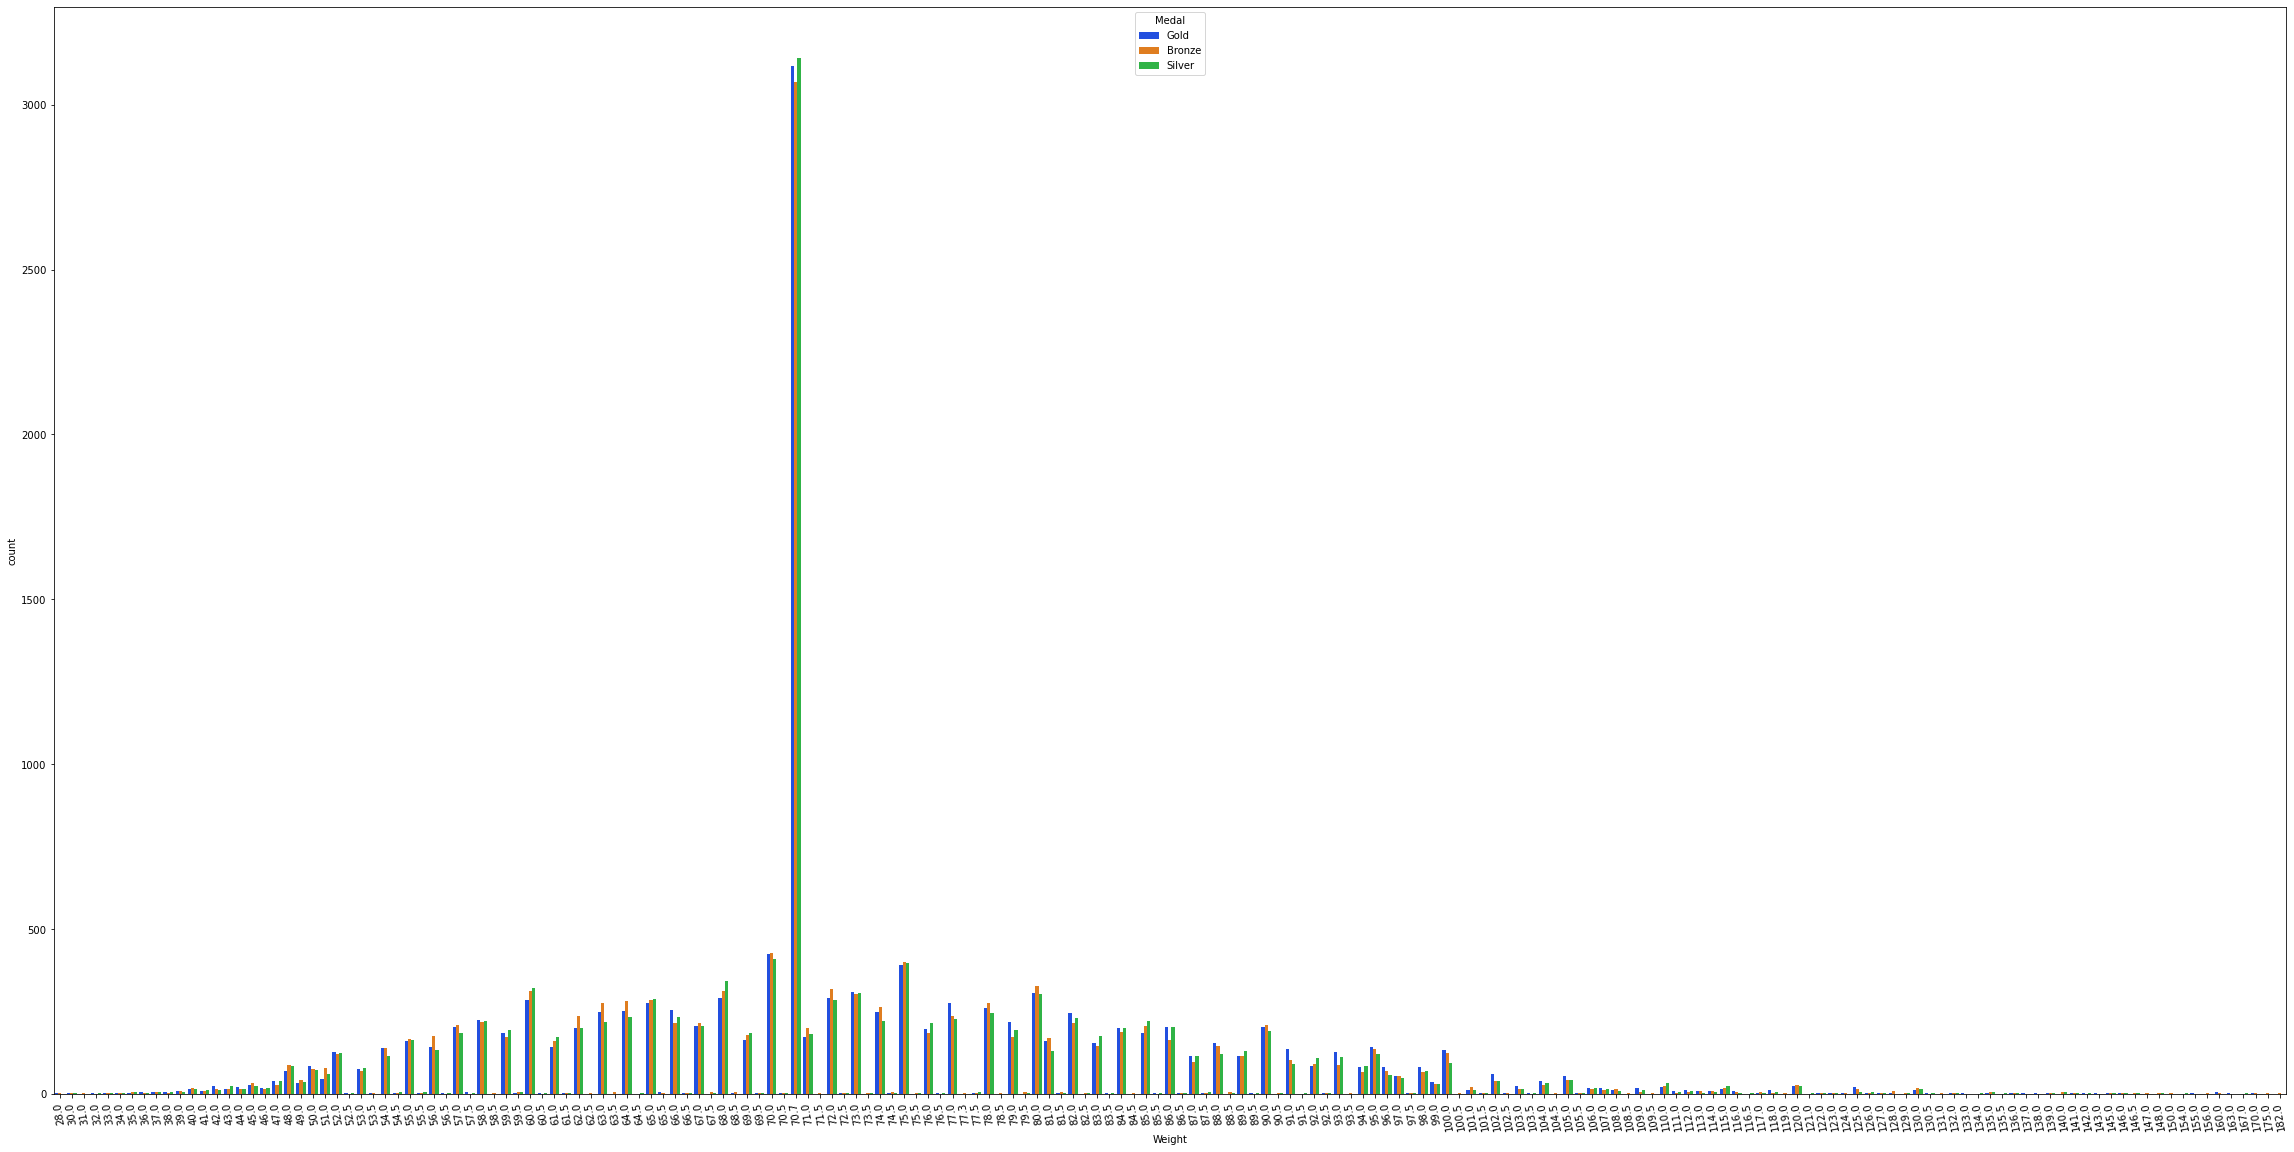

In [37]:
# Влияние веса на медали
df_no_medal = df.loc[df['Medal'] != 'No medal']
fig = plt.subplots(figsize=(40, 20))
d = sns.countplot(x='Weight', data=df_no_medal, hue='Medal', palette='bright')
_ = plt.setp(d.get_xticklabels(), rotation=100)

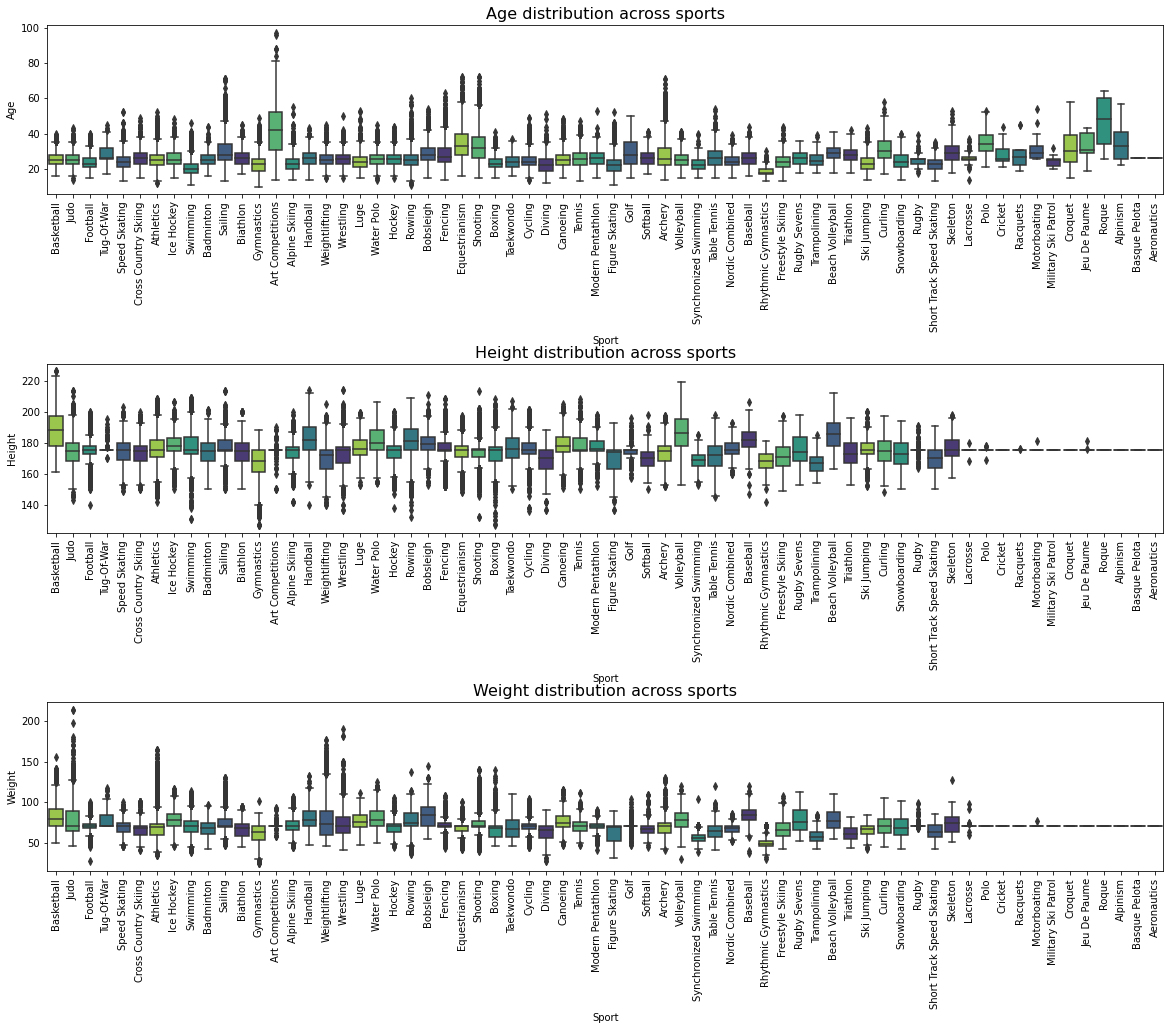

In [38]:
# Стандарты для каждого вида спорта
plt.figure(figsize=(20, 10))
plt.subplot(311)
ax = sns.boxplot(
    x='Sport', y='Age', data=df, palette=sns.color_palette(palette='viridis_r')
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Sport', fontsize=10)
ax.set_ylabel('Age', fontsize=10)
ax.set_title('Age distribution across sports', fontsize=16)
plt.subplot(312)
ax = sns.boxplot(
    x='Sport', y='Height', data=df, 
    palette=sns.color_palette(palette='viridis_r')
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Sport', fontsize=10)
ax.set_ylabel('Height', fontsize=10)
ax.set_title('Height distribution across sports', fontsize=16)
plt.subplot(313)
ax = sns.boxplot(
    x='Sport', y='Weight', data=df, 
    palette=sns.color_palette(palette='viridis_r')
    )
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('Sport', fontsize=10)
ax.set_ylabel('Weight', fontsize=10)
ax.set_title('Weight distribution across sports', fontsize=16)
plt.subplots_adjust(wspace=1, hspace=1, top=1.3)

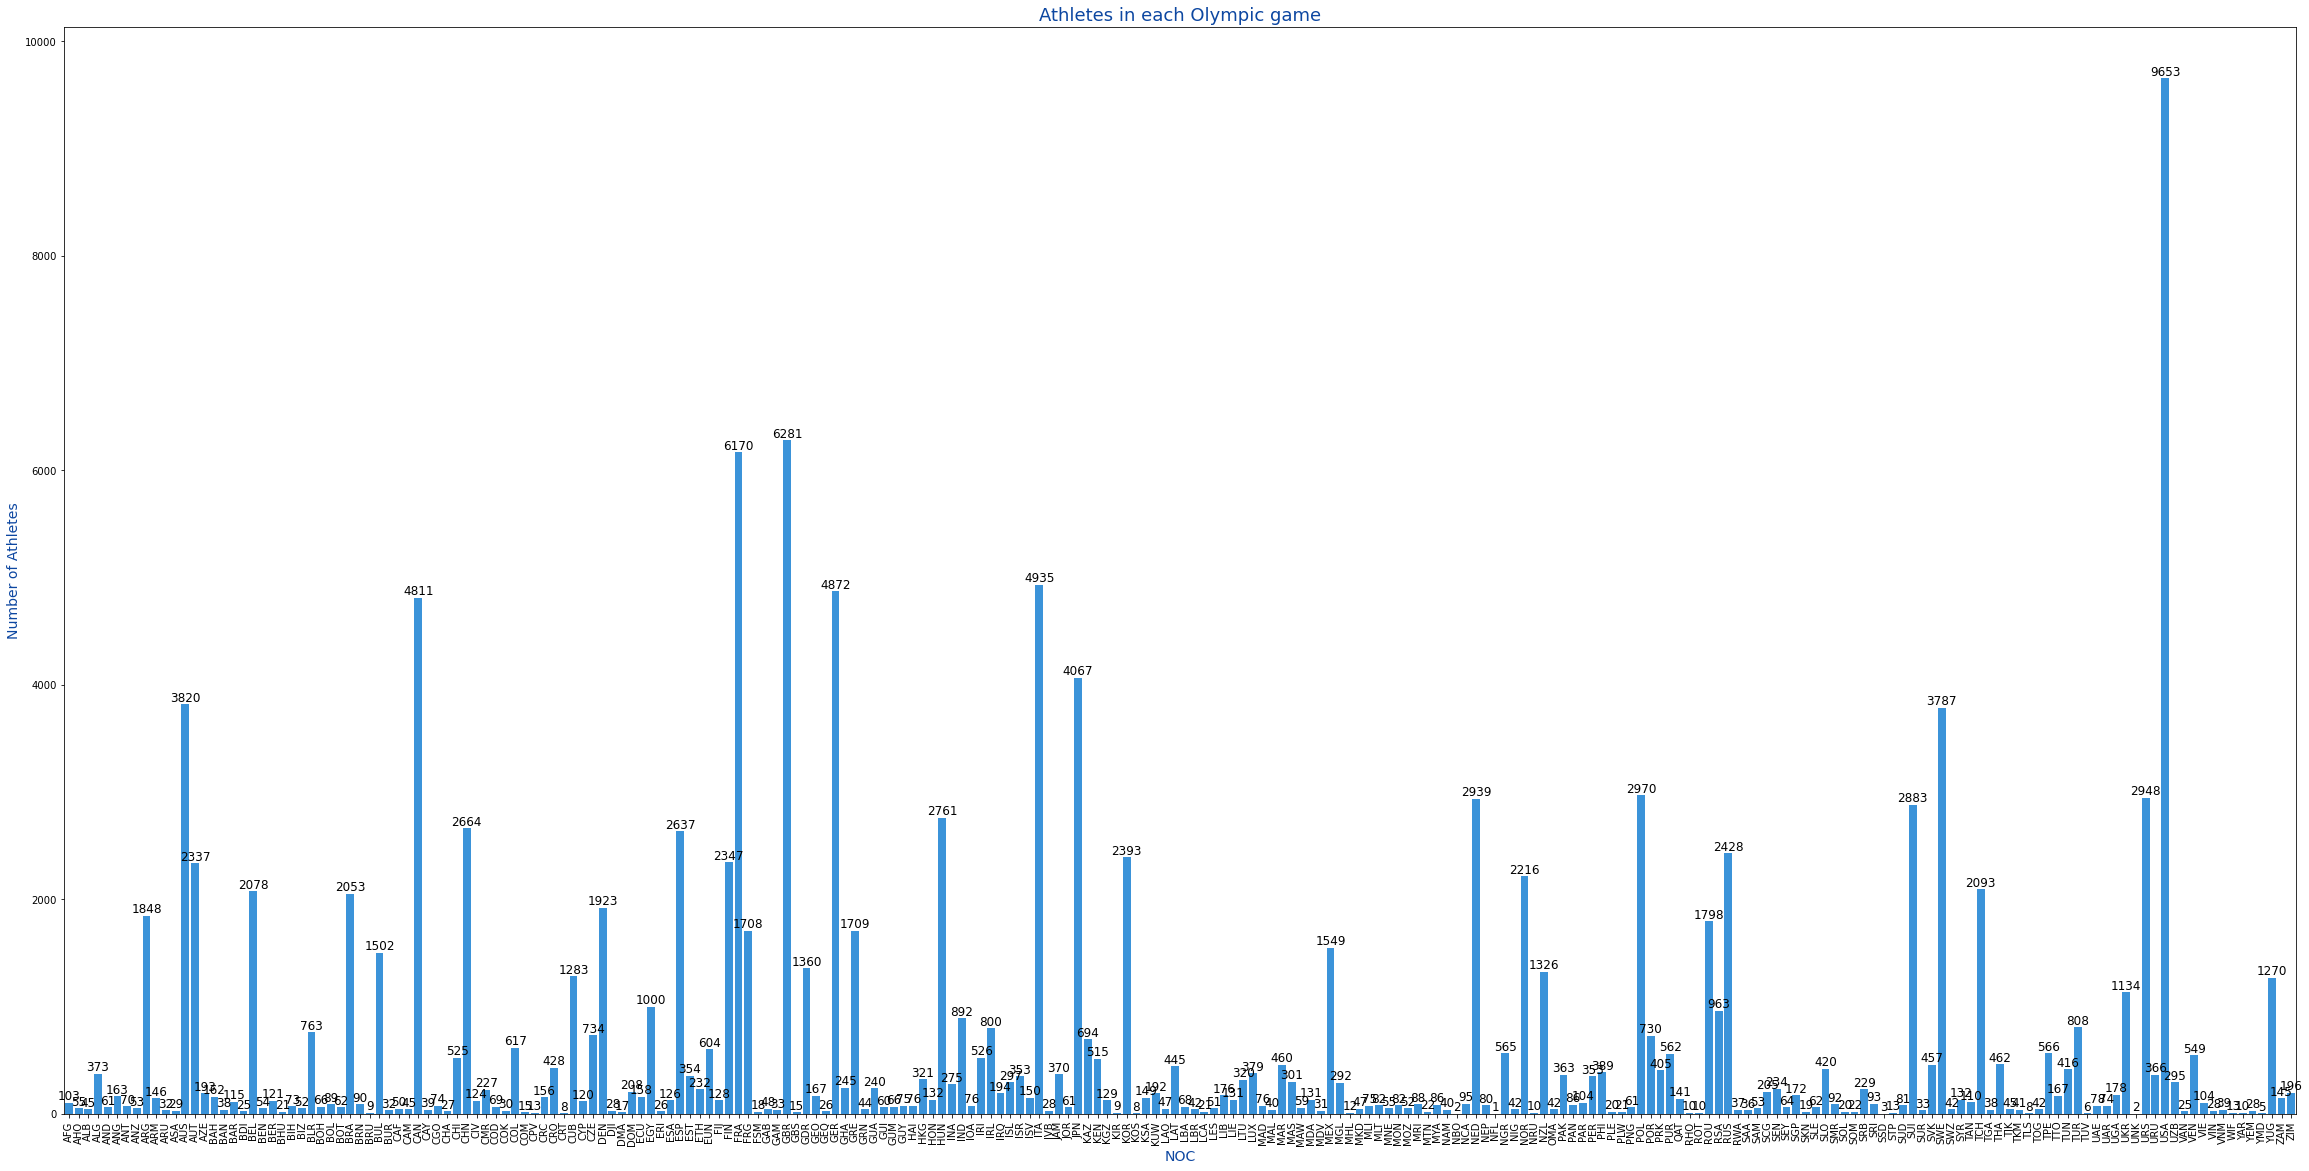

In [39]:
# 5 Как менялось количество атлетов от каждой страны
athletes = df.pivot_table(
    df, index=['NOC'], aggfunc=lambda x: len(x.unique())
    ).reset_index()[['NOC', 'ID']]
fig, ax = plt.subplots(figsize=(40, 20))
a = sns.barplot(x='NOC', y='ID', data=athletes, ax=ax, color="#2196F3")
a.set_xticklabels(labels=athletes['NOC'], rotation=90)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., 
            p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

ax.set_xlabel('NOC', size=14, color="#0D47A1")
ax.set_ylabel('Number of Athletes', size=14, color="#0D47A1")
ax.set_title('Athletes in each Olympic game', size=18, color="#0D47A1")

plt.show()

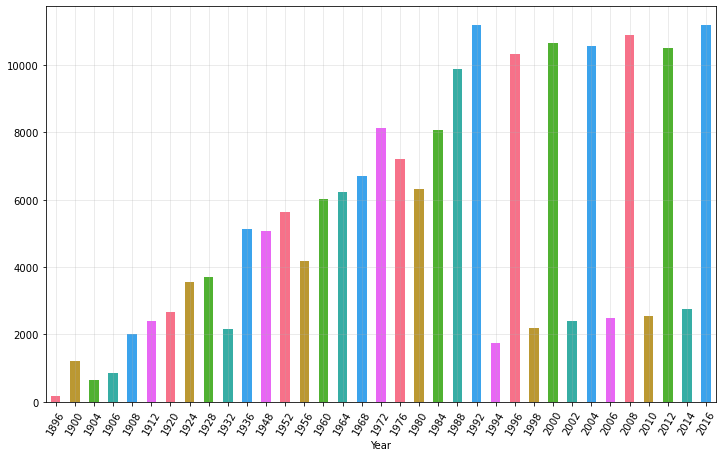

In [132]:
# 5 Количество участников в каждом году
data = df.loc[:, ["ID", "Year"]]
plt.figure(figsize=(12, 16))
plt.subplot(211)
turkey = data.groupby("Year")["ID"].nunique().plot(
    kind="bar", color=sns.color_palette("husl"), linewidth=1
    )
plt.xticks(rotation=60)
plt.grid(True, alpha=.3)
plt.show()

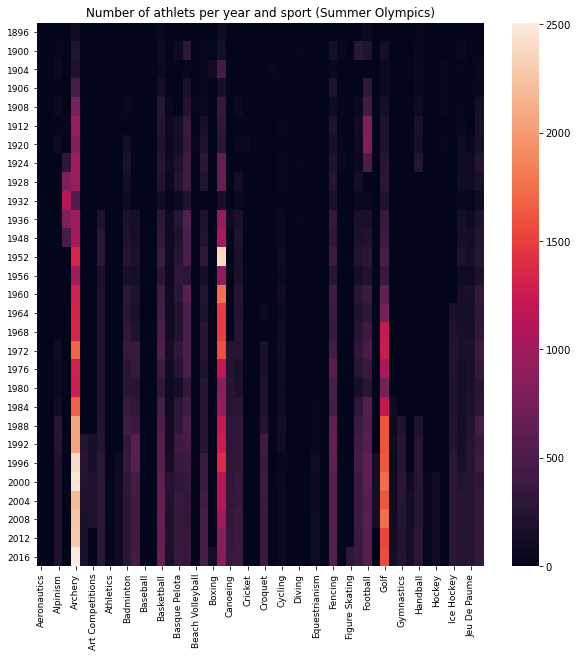

In [134]:
tmp = df.groupby(['Year', 'City', 'Season'])['Sport'].value_counts()
df_k = pd.DataFrame(
    data={'Athlets': tmp.values}, index=tmp.index
    ).reset_index()
df_S = df_k[df_k['Season'] == 'Summer']
piv = pd.pivot_table(
    df_S, values="Athlets", index=["Year"], columns=["Sport"], fill_value=0
    )
m = piv.values
ax = sns.heatmap(m)
ax.set_xticklabels(list(piv.columns), fontsize = 9)
ax.set_yticklabels(list(piv.index), fontsize = 9)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
ax.set_title('Number of athlets per year and sport (Summer Olympics)')
plt.show()

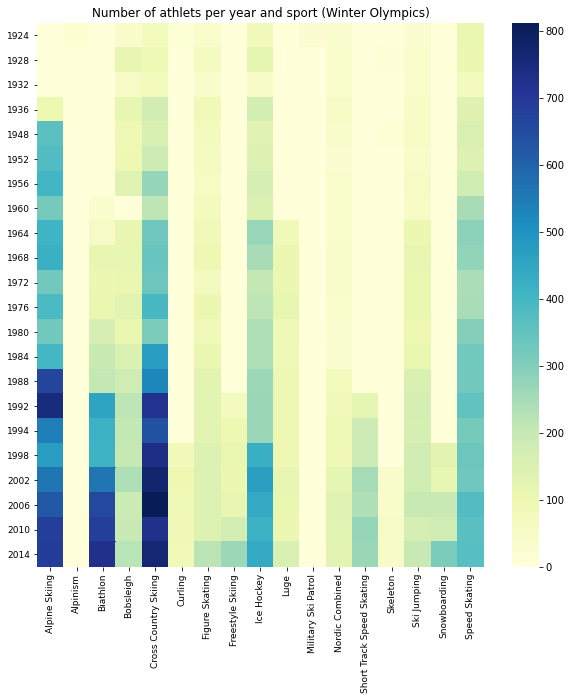

In [136]:
df_W = df_k[df_k['Season'] == 'Winter']
piv = pd.pivot_table(
    df_W, values="Athlets", index=["Year"], columns=["Sport"], fill_value=0
    )
m = piv.values
ax = sns.heatmap(m, cmap="YlGnBu")
ax.set_xticklabels(list(piv.columns), fontsize = 9)
ax.set_yticklabels(list(piv.index), fontsize = 9)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
ax.set_title('Number of athlets per year and sport (Winter Olympics)')
plt.show()

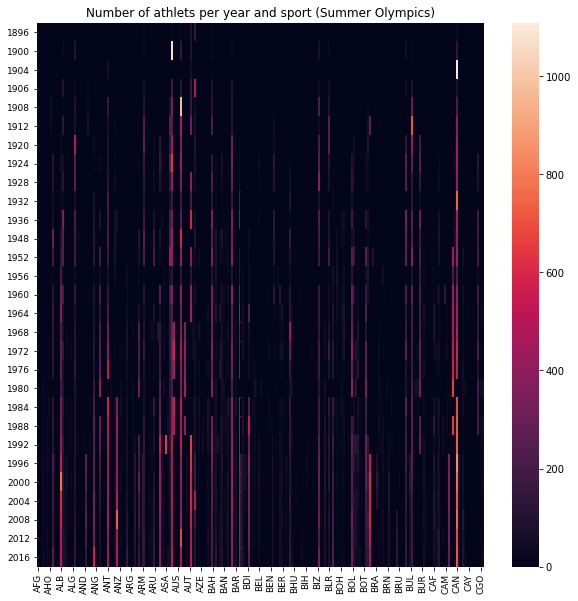

In [137]:
# Изменение количества участников по каждой стране по летним олимпийским играм
tmp = df.groupby(['Year', 'City', 'Season'])['NOC'].value_counts()
df_k = pd.DataFrame(
    data={'Athlets': tmp.values}, index=tmp.index
    ).reset_index()
df_S = df_k[df_k['Season'] == 'Summer']
piv = pd.pivot_table(
    df_S, values="Athlets", index=["Year"], columns=["NOC"], fill_value=0
    )
m = piv.values
ax = sns.heatmap(m)
ax.set_xticklabels(list(piv.columns), fontsize = 9)
ax.set_yticklabels(list(piv.index), fontsize = 9)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
ax.set_title('Number of athlets per year and sport (Summer Olympics)')
plt.show()

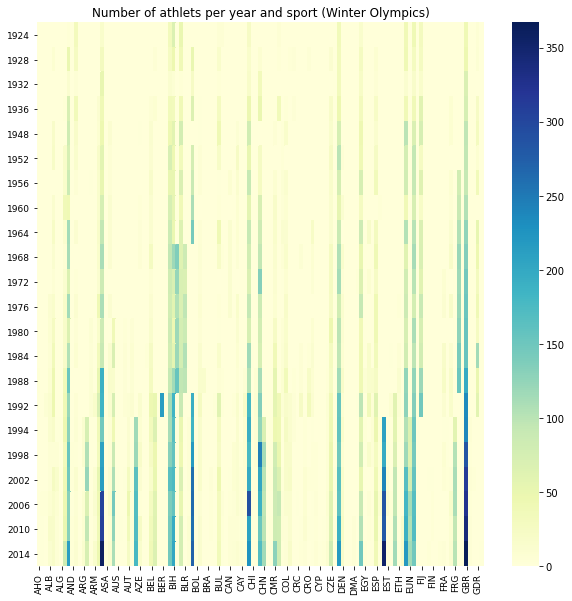

In [138]:
# Изменение количества участников по каждой стране по зимним олимпийским играм
df_W = df_k[df_k['Season'] == 'Winter']
piv = pd.pivot_table(
    df_W, values="Athlets", index=["Year"], columns=["NOC"], fill_value=0
    )
m = piv.values
ax = sns.heatmap(m, cmap="YlGnBu")
ax.set_xticklabels(list(piv.columns), fontsize = 9)
ax.set_yticklabels(list(piv.index), fontsize = 9)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
ax.set_title('Number of athlets per year and sport (Winter Olympics)')
plt.show()

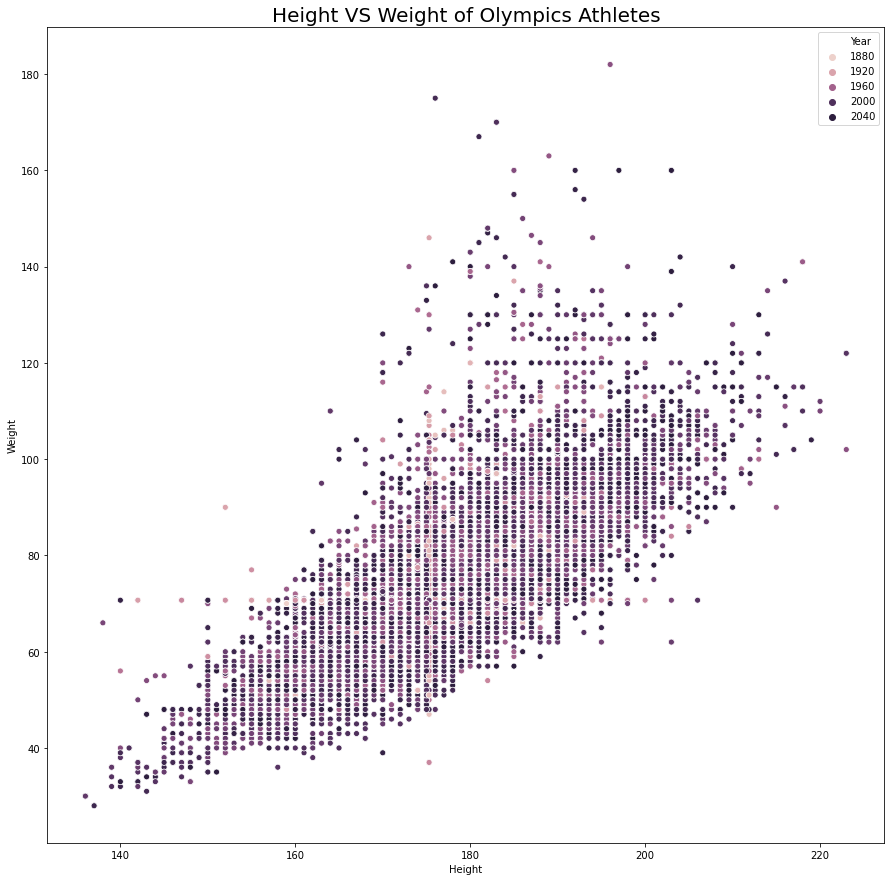

In [45]:
# Изменения пропорций мужчини женщин
plt.figure(figsize=(15, 15))
sns.scatterplot(x="Height", y="Weight", hue='Year', data=df_no_medal)
plt.title('Height VS Weight of Olympics Athletes', fontsize=20)
plt.show()

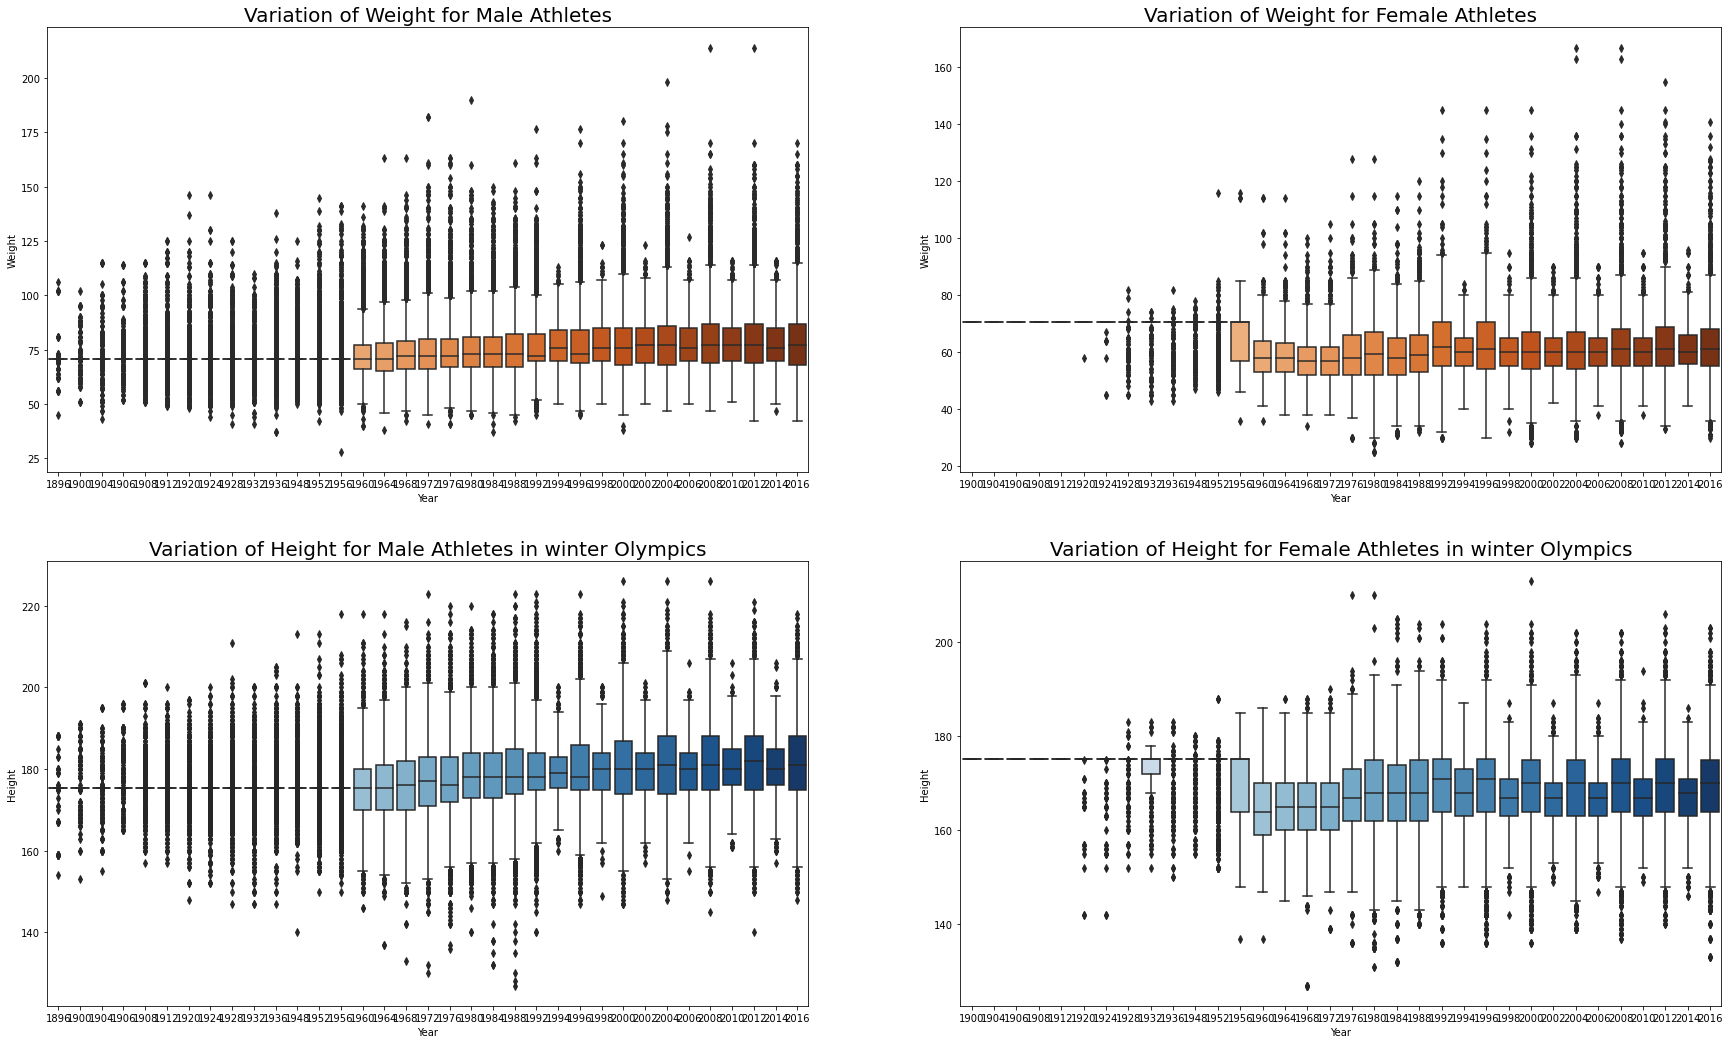

In [46]:
# Пропорции мужчин и женщин в каждом году
plt.figure(figsize=(30, 18))
plt.subplot(221)
sns.boxplot('Year', 'Weight', data=men, palette='Oranges')
plt.title('Variation of Weight for Male Athletes', fontsize=20)
plt.subplot(222)
sns.boxplot('Year', 'Weight', data=women, palette='Oranges')
plt.title('Variation of Weight for Female Athletes', fontsize=20)
plt.subplot(223)
sns.boxplot('Year', 'Height', data=men, palette='Blues')
plt.title(
    'Variation of Height for Male Athletes in winter Olympics', fontsize=20
    )
plt.subplot(224)
sns.boxplot('Year', 'Height', data=women, palette='Blues')
plt.title(
    'Variation of Height for Female Athletes in winter Olympics', fontsize=20
    )

plt.show()

In [47]:
# 6 средний возраст учавствующих, самы молодой и самый старый участник
print('The youngest athlete:', df.Age.min())
print('The average age of athletes:', df.Age.mean())
print('The oldest athlete:', df.Age.max())

The youngest athlete: 10.0
The average age of athletes: 25.558404520570477
The oldest athlete: 97.0


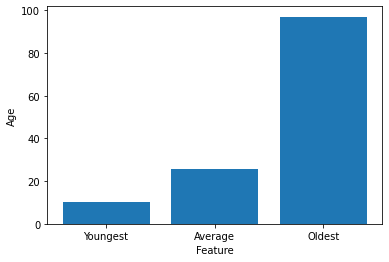

In [48]:
# Визуализация вышеописанных данных
y = np.array([df.Age.min(), df.Age.mean(), df.Age.max()])
x = ['Youngest', 'Average', 'Oldest']
plt.bar(x, y)
plt.xlabel('Feature')
plt.ylabel('Age')
plt.show()

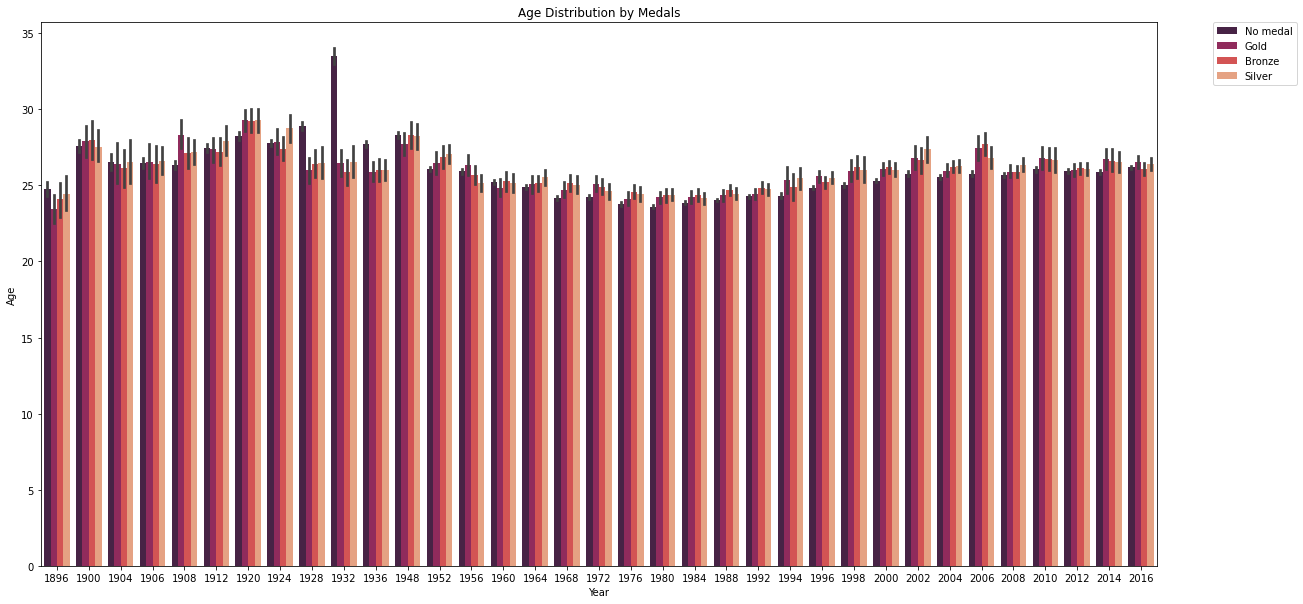

In [49]:
# Влияет ли возраст на вид полученной медали?
plt.figure(figsize=(20, 10))
sns.barplot(x="Year", y="Age", data=df, 
            hue="Medal", palette="rocket") 

plt.title('Age Distribution by Medals') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

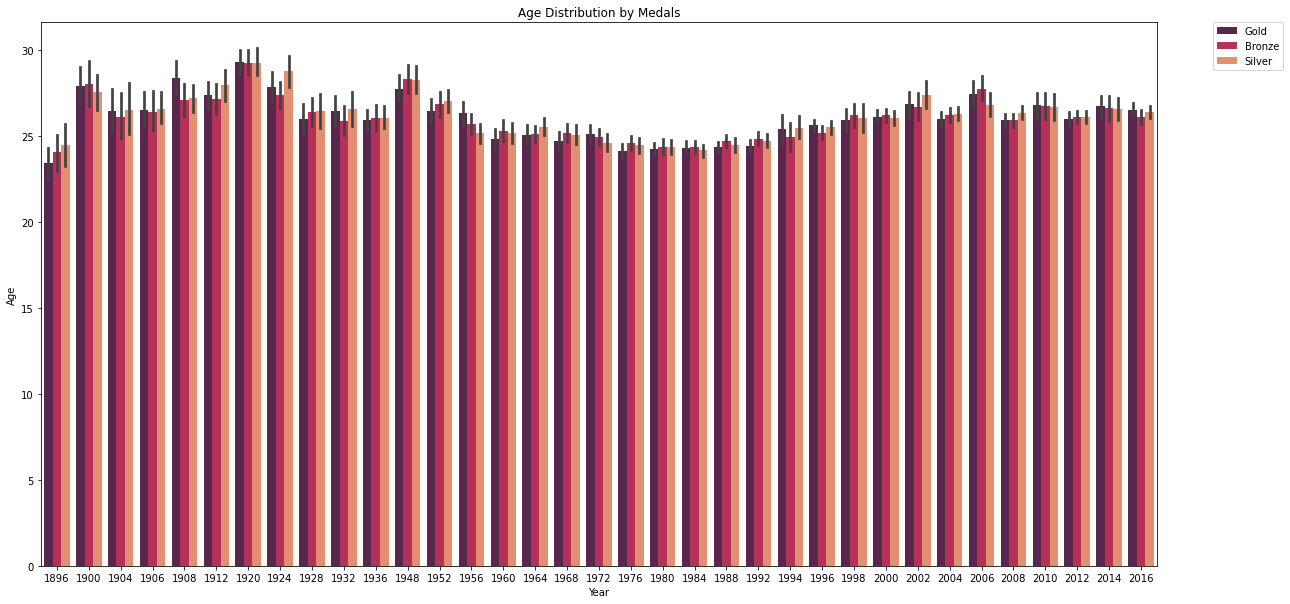

In [50]:
# Влияет ли возраст на вид полученной медали?(Вариант2)
plt.figure(figsize=(20, 10))
sns.barplot(x="Year", y="Age", data=df_no_medal, 
            hue="Medal", palette="rocket") 

plt.title('Age Distribution by Medals') 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()